In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

### 1.1 Load the dataset and display the first 10 rows


In [35]:

# Define column names based on data dictionary
columns = ['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 
           'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
           'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 
           'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

# Load data
mushroom_data = pd.read_csv('data/agaricus-lepiota.data', names=columns)

# Display first 10 rows
print("First 10 rows of the dataset:")
print(mushroom_data.head(10))


First 10 rows of the dataset:
  poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   
5         e         x           y         y       t    a               f   
6         e         b           s         w       t    a               f   
7         e         b           y         w       t    l               f   
8         p         x           y         w       t    p               f   
9         e         b           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        

### 1.2 Check for missing values and display summary statistics


In [36]:
print("\nMissing values in each column:")
print(mushroom_data.isnull().sum())

print("\nSummary statistics for categorical data:")
print(mushroom_data.describe(include=['object']))

# Check unique values in each column
print("\nUnique values in each column:")
for column in mushroom_data.columns:
    print(f"{column}: {mushroom_data[column].unique()}")


Missing values in each column:
poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Summary statistics for categorical data:
       poisonous cap-shape cap-surface cap-color bruises  odor  \
count       8124      8124        8124      8124    8124  8124   
unique         2         6           4        10       2     9   
top            e         

## 2.1 Explore data patterns and distributions

In [37]:
# Complete mapping dictionaries for all features
cap_shape_map = {
    'b': 'bell', 'c': 'conical', 'x': 'convex', 
    'f': 'flat', 'k': 'knobbed', 's': 'sunken'
}

cap_surface_map = {
    'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'
}

cap_color_map = {
    'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
    'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red',
    'w': 'white', 'y': 'yellow'
}

bruises_map = {'t': 'bruises', 'f': 'no bruises'}

odor_map = {
    'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy',
    'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'
}

gill_attachment_map = {
    'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'
}

gill_spacing_map = {'c': 'close', 'w': 'crowded', 'd': 'distant'}

gill_size_map = {'b': 'broad', 'n': 'narrow'}

gill_color_map = {
    'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate',
    'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink',
    'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'
}

stalk_shape_map = {'e': 'enlarging', 't': 'tapering'}

stalk_root_map = {
    'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal',
    'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'
}

stalk_surface_above_ring_map = {
    'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'
}

stalk_surface_below_ring_map = {
    'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'
}

stalk_color_above_ring_map = {
    'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
    'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white',
    'y': 'yellow'
}

stalk_color_below_ring_map = {
    'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
    'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white',
    'y': 'yellow'
}

veil_type_map = {'p': 'partial', 'u': 'universal'}

veil_color_map = {
    'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'
}

ring_number_map = {'n': 'none', 'o': 'one', 't': 'two'}

ring_type_map = {
    'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large',
    'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'
}

spore_print_color_map = {
    'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate',
    'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'
}

population_map = {
    'a': 'abundant', 'c': 'clustered', 'n': 'numerous',
    's': 'scattered', 'v': 'several', 'y': 'solitary'
}

habitat_map = {
    'g': 'grasses', 'l': 'leaves', 'm': 'meadows',
    'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'
}

poisonous_map = {'p': 'poisonous', 'e': 'edible'}

# Create a dictionary that maps column names to their respective mapping dictionaries
mapping_dictionaries = {
    'poisonous': poisonous_map,
    'cap-shape': cap_shape_map,
    'cap-surface': cap_surface_map,
    'cap-color': cap_color_map,
    'bruises': bruises_map,
    'odor': odor_map,
    'gill-attachment': gill_attachment_map,
    'gill-spacing': gill_spacing_map,
    'gill-size': gill_size_map,
    'gill-color': gill_color_map,
    'stalk-shape': stalk_shape_map,
    'stalk-root': stalk_root_map,
    'stalk-surface-above-ring': stalk_surface_above_ring_map,
    'stalk-surface-below-ring': stalk_surface_below_ring_map,
    'stalk-color-above-ring': stalk_color_above_ring_map,
    'stalk-color-below-ring': stalk_color_below_ring_map,
    'veil-type': veil_type_map,
    'veil-color': veil_color_map,
    'ring-number': ring_number_map,
    'ring-type': ring_type_map,
    'spore-print-color': spore_print_color_map,
    'population': population_map,
    'habitat': habitat_map
}


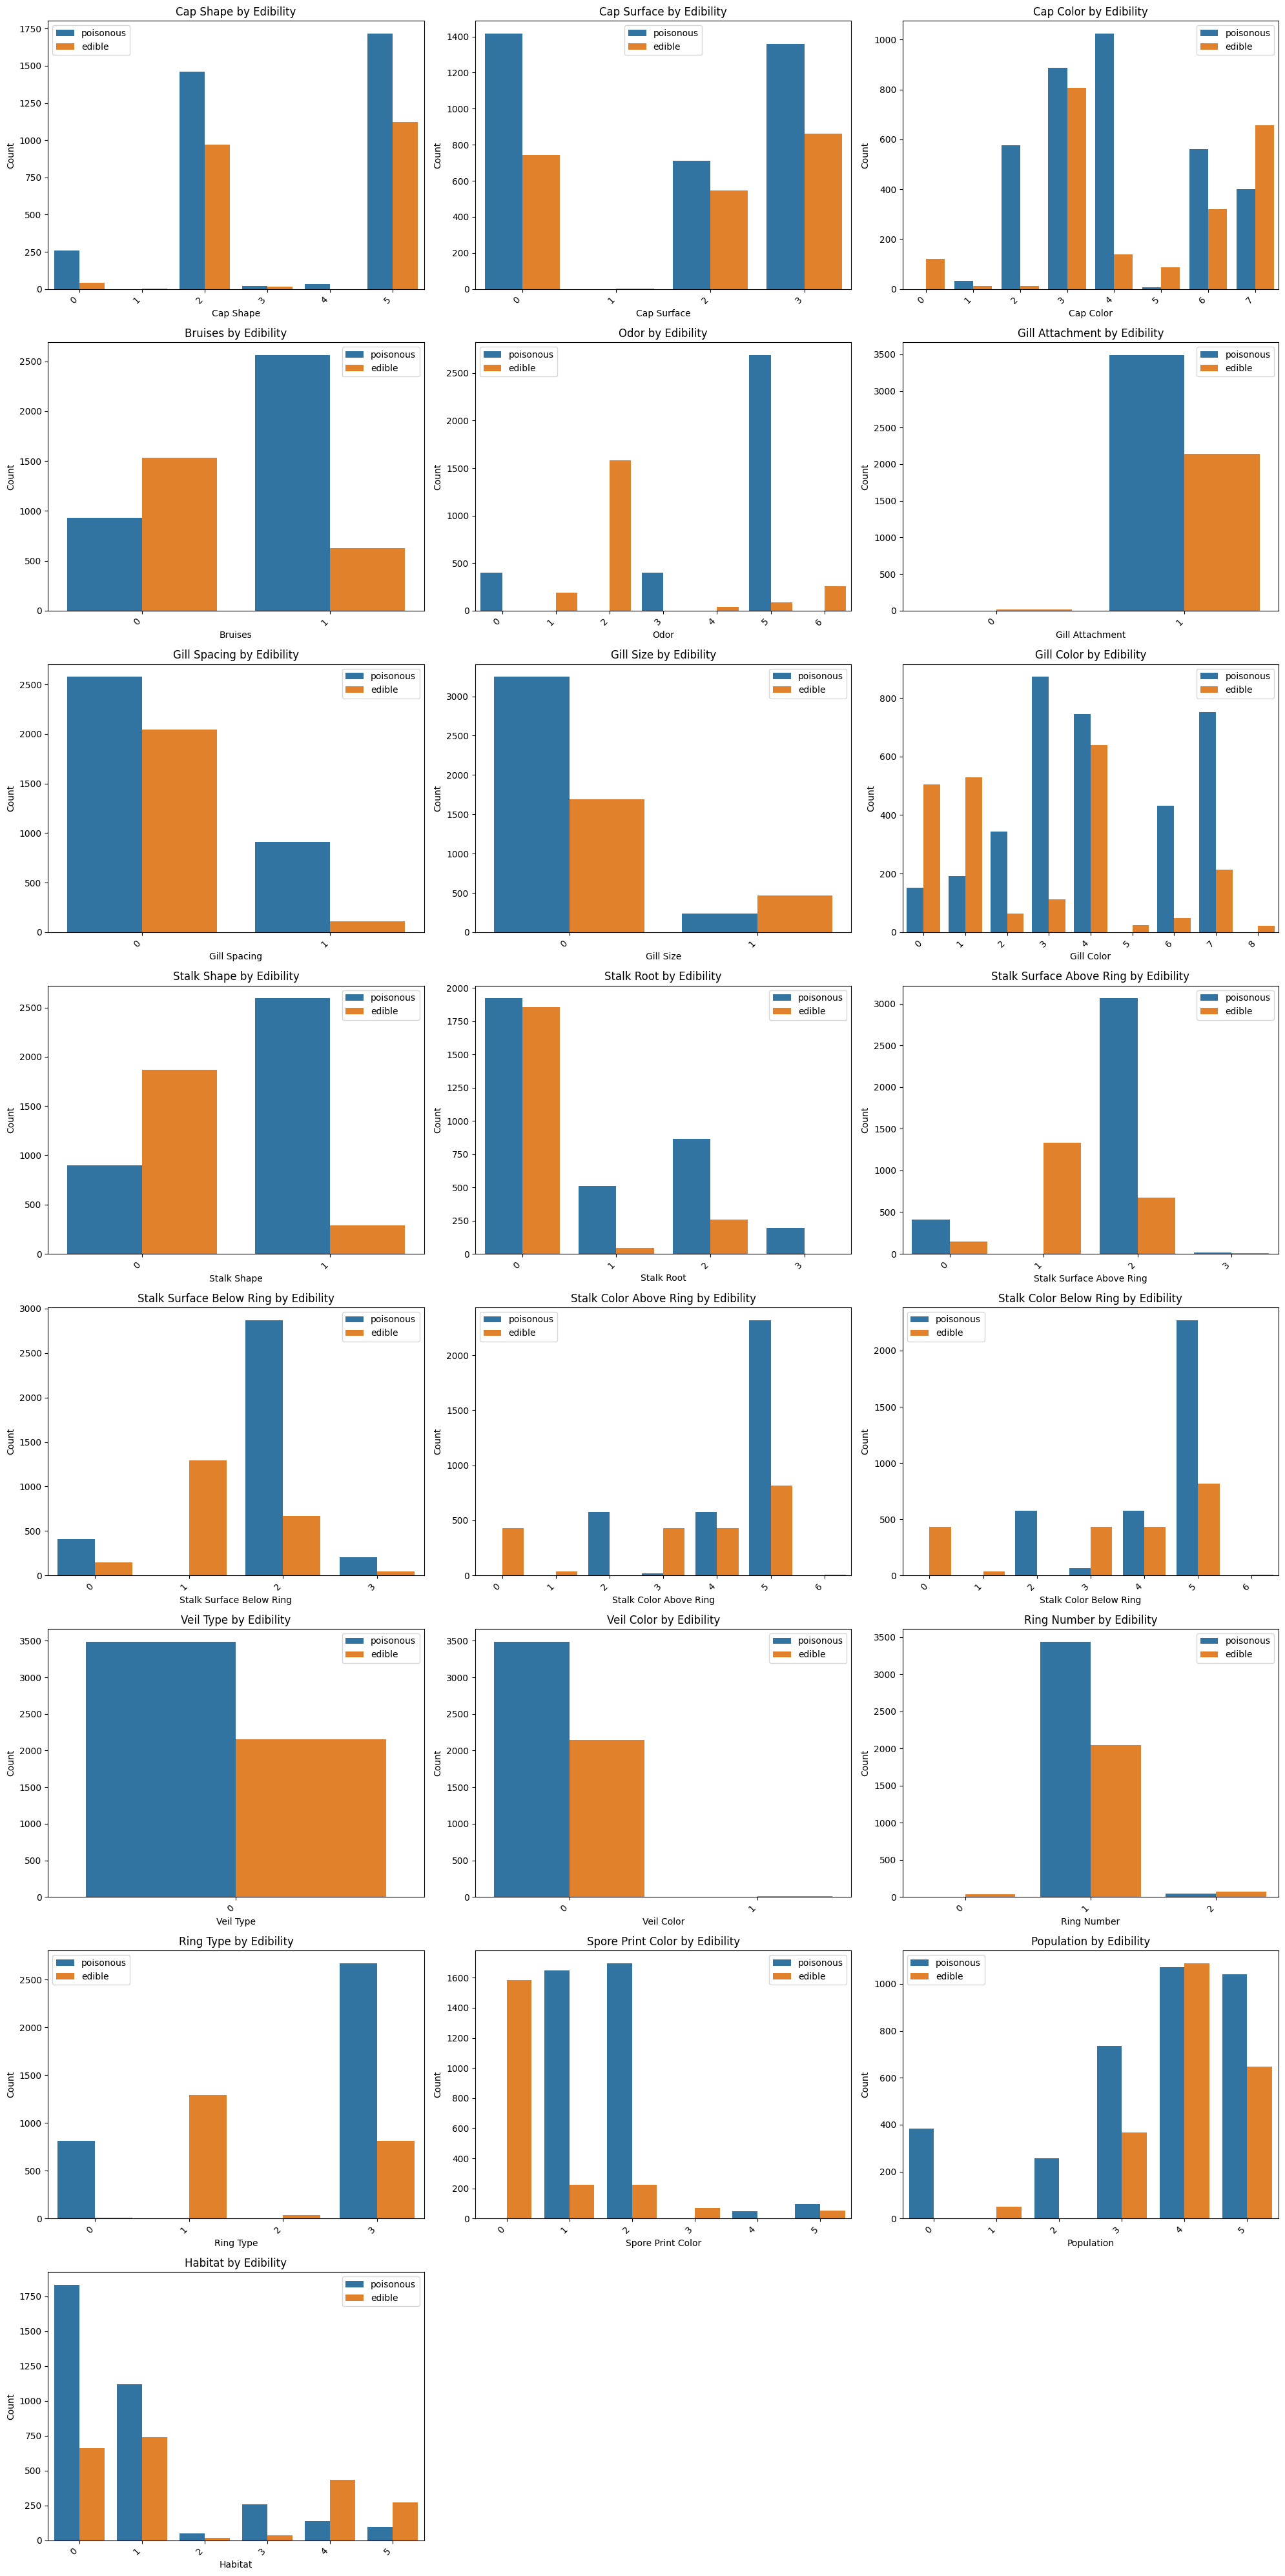

In [ ]:


def create_feature_plots(data, feature_cols, mapping_dicts):
    """
    Create countplots for all features by edibility with full category names
    
    Parameters:
    data: pandas DataFrame
    feature_cols: list of feature column names
    mapping_dicts: dictionary of dictionaries for feature value mappings
    """
    # Calculate grid dimensions based on number of features
    n_features = len(feature_cols)
    n_cols = 3  # Number of columns in grid
    n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    
    # Flatten axes array for easier indexing
    axes = axes.flatten()
    
    for i, feature in enumerate(feature_cols):
        ax = axes[i]
            
        # Create the countplot
        sns.countplot(x=feature, hue='poisonous', data=data, ax=ax)
        
        # Apply mappings to convert codes to full category names
        if feature in mapping_dicts:
            positions = range(len(ax.get_xticks()))
            current_labels = [x.get_text() for x in ax.get_xticklabels()]
            new_labels = [mapping_dicts[feature].get(label, label) for label in current_labels]
            
            ax.set_xticks(positions)
            ax.set_xticklabels(new_labels, rotation=45, ha='right')
            
        ax.set_title(f'{feature.replace("-", " ").title()} by Edibility')
        ax.set_xlabel(feature.replace("-", " ").title())
        ax.set_ylabel('Count')
        
        # Set legend with full category names
        handles, _ = ax.get_legend_handles_labels()
        ax.legend(handles, ['poisonous', 'edible'])
    
    # Hide empty subplots if any
    for j in range(i + 1, n_rows * n_cols):
        axes[j].set_visible(False)
    
    
    plt.tight_layout()
    plt.show()
    fig.savefig('mushroom_feature_distributions.png', dpi=300, bbox_inches='tight')

# First, show the target variable distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='poisonous', data=mushroom_data)
positions = range(len(ax.get_xticks()))
ax.set_xticks(positions)
ax.set_xticklabels([poisonous_map[x.get_text()] for x in ax.get_xticklabels()])
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

# Get all feature columns (excluding the target variable)
feature_columns = [col for col in mushroom_data.columns if col != 'poisonous']

# Create plots for all features
create_feature_plots(mushroom_data, feature_columns, mapping_dictionaries)


## 2.2 Handle missing values and clean data

In [39]:

print("Checking for '?' values in the data:")
for column in mushroom_data.columns:
    if (mushroom_data[column] == '?').any():
        print(f"{column} has missing values encoded as '?'")
        # Replace '?' with NaN for proper handling
        mushroom_data[column] = mushroom_data[column].replace('?', np.nan)

# Drop rows with missing values or impute them
# For simplicity in this initial code, we'll drop rows with missing values
mushroom_data = mushroom_data.dropna()
print(f"Dataset shape after dropping missing values: {mushroom_data.shape}")

# 2.3 Feature selection and engineering
# Convert categorical features to numerical using LabelEncoder
label_encoders = {}
# Save a copy of the original data before encoding
mushroom_data_original = mushroom_data.copy()

for column in mushroom_data.columns:
    le = LabelEncoder()
    mushroom_data[column] = le.fit_transform(mushroom_data[column])
    label_encoders[column] = le

print("Data after encoding categorical variables:")
print(mushroom_data.head())

Checking for '?' values in the data:
stalk-root has missing values encoded as '?'
Dataset shape after dropping missing values: (5644, 23)
Data after encoding categorical variables:
   poisonous  cap-shape  cap-surface  cap-color  bruises  odor  \
0          1          5            2          4        1     6   
1          0          5            2          7        1     0   
2          0          0            2          6        1     3   
3          1          5            3          6        1     6   
4          0          5            2          3        0     5   

   gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                1             0          1           2  ...   
1                1             0          0           2  ...   
2                1             0          0           3  ...   
3                1             0          1           3  ...   
4                1             1          0           2  ...   

   stalk-surface-below-ring  stalk-co

## 3.1 Choose features and target

In [40]:

# Based on exploration, select relevant features
# For initial simple model, we'll select a few potentially important features
selected_features = ['odor', 'gill-size', 'spore-print-color', 'cap-shape', 'ring-type']




## 3.2 Define X and y

In [41]:
# Analysis 1: Using just odor
X1 = mushroom_data[['odor']]
y1 = mushroom_data['poisonous']

# Display feature set information
print("\nAnalysis 1 - Odor only:")
print(f"Features shape: {X1.shape}")
print(X1.head())


Analysis 1 - Odor only:
Features shape: (5644, 1)
   odor
0     6
1     0
2     3
3     6
4     5


In [42]:
# Analysis 1: Count categories in 'odor'
print("===== ANALYSIS 1: ODOR =====")
odor_counts = mushroom_data_original['odor'].value_counts()
print(f"'odor' has {len(odor_counts)} different categories:")
for odor, count in odor_counts.items():
    odor_name = odor_map.get(odor, odor)
    print(f"- {odor} ({odor_name}): {count} instances")
print("\n")

===== ANALYSIS 1: ODOR =====
'odor' has 7 different categories:
- n (none): 2776 instances
- f (foul): 1584 instances
- a (almond): 400 instances
- l (anise): 400 instances
- p (pungent): 256 instances
- c (creosote): 192 instances
- m (musty): 36 instances




<Figure size 1200x600 with 0 Axes>

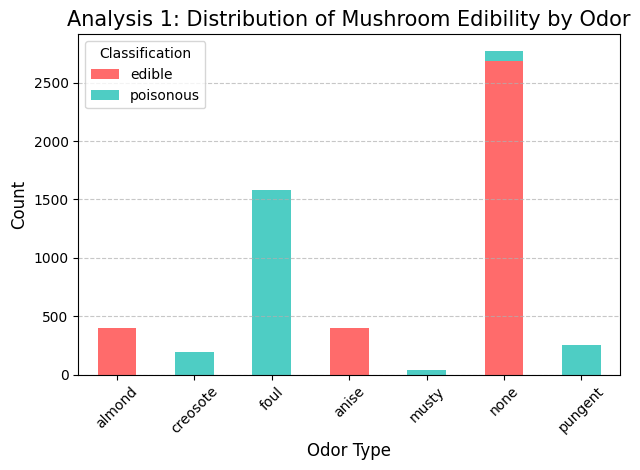

In [43]:
# Create a visualization of odor distribution by edibility
plt.figure(figsize=(12, 6))
odor_counts = mushroom_data_original.groupby(['odor', 'poisonous']).size().unstack(fill_value=0)

# Convert encoded values to full names for better readability
odor_full_names = [odor_map.get(idx, idx) for idx in odor_counts.index]
odor_counts.index = odor_full_names
odor_counts.columns = [poisonous_map.get(col, col) for col in odor_counts.columns]

# Plot the histogram
ax = odor_counts.plot(kind='bar', stacked=True, color=['#ff6b6b', '#4ecdc4'])
plt.title('Analysis 1: Distribution of Mushroom Edibility by Odor', fontsize=15)
plt.xlabel('Odor Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Classification')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [44]:
# Analysis 2: Using just spore print color
X2 = mushroom_data[['spore-print-color']]
y2 = mushroom_data['poisonous']

print("\nAnalysis 2 - Spore print color only:")
print(f"Features shape: {X2.shape}")
print(X2.head())


Analysis 2 - Spore print color only:
Features shape: (5644, 1)
   spore-print-color
0                  1
1                  2
2                  2
3                  1
4                  2


In [45]:
# Analysis 2: Count categories in 'spore-print-color'
print("===== ANALYSIS 2: SPORE PRINT COLOR =====")
spore_counts = mushroom_data_original['spore-print-color'].value_counts()
print(f"'spore-print-color' has {len(spore_counts)} different categories:")
for spore, count in spore_counts.items():
    spore_name = spore_print_color_map.get(spore, spore)
    print(f"- {spore} ({spore_name}): {count} instances")
print("\n")

===== ANALYSIS 2: SPORE PRINT COLOR =====
'spore-print-color' has 6 different categories:
- n (brown): 1920 instances
- k (black): 1872 instances
- h (chocolate): 1584 instances
- w (white): 148 instances
- r (green): 72 instances
- u (purple): 48 instances




<Figure size 1200x600 with 0 Axes>

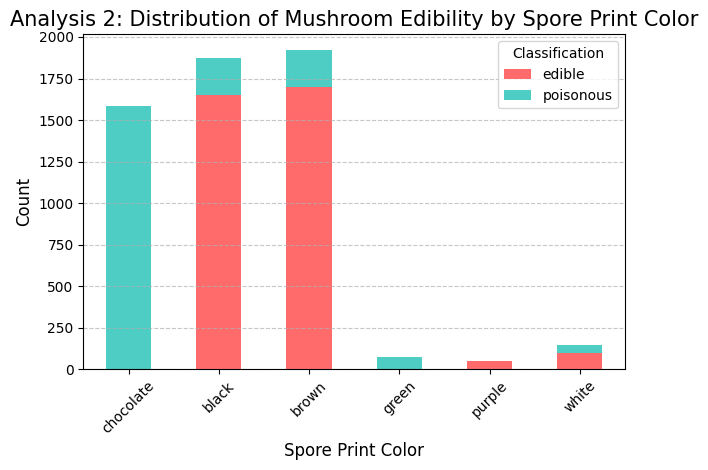

In [46]:
# Create a visualization of spore print color distribution by edibility
plt.figure(figsize=(12, 6))
spore_counts = mushroom_data_original.groupby(['spore-print-color', 'poisonous']).size().unstack(fill_value=0)

# Convert encoded values to full names for better readability
spore_full_names = [spore_print_color_map.get(idx, idx) for idx in spore_counts.index]
spore_counts.index = spore_full_names
spore_counts.columns = [poisonous_map.get(col, col) for col in spore_counts.columns]

# Plot the histogram
ax = spore_counts.plot(kind='bar', stacked=True, color=['#ff6b6b', '#4ecdc4'])
plt.title('Analysis 2: Distribution of Mushroom Edibility by Spore Print Color', fontsize=15)
plt.xlabel('Spore Print Color', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Classification')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [47]:
# Analysis 3: Using gill size and cap shape
X3 = mushroom_data[['gill-size', 'cap-shape']]
y3 = mushroom_data['poisonous']

print("\nAnalysis 3 - Gill size + Cap shape:")
print(f"Features shape: {X3.shape}")
print(X3.head())


Analysis 3 - Gill size + Cap shape:
Features shape: (5644, 2)
   gill-size  cap-shape
0          1          5
1          0          5
2          0          0
3          1          5
4          0          5


In [48]:
# Analysis 3: Count combinations of 'gill-size' and 'cap-shape'
print("===== ANALYSIS 3: GILL SIZE AND CAP SHAPE =====")
gill_subcategories = mushroom_data_original['gill-size'].nunique()
cap_subcategories = mushroom_data_original['cap-shape'].nunique()
total_possible = gill_subcategories * cap_subcategories

print(f"'gill-size' has {gill_subcategories} subcategories:")
for gill, count in mushroom_data_original['gill-size'].value_counts().items():
    gill_name = gill_size_map.get(gill, gill)
    print(f"- {gill} ({gill_name}): {count} instances")

print(f"\n'cap-shape' has {cap_subcategories} subcategories:")
for cap, count in mushroom_data_original['cap-shape'].value_counts().items():
    cap_name = cap_shape_map.get(cap, cap)
    print(f"- {cap} ({cap_name}): {count} instances")

# Count actual combinations
gill_cap_combo = mushroom_data_original.groupby(['gill-size', 'cap-shape']).size().reset_index(name='count')
print(f"\nTotal possible combinations: {total_possible}")
print(f"Actual combinations found in data: {len(gill_cap_combo)}")
print("\nActual combinations:")
for _, row in gill_cap_combo.iterrows():
    gill = row['gill-size']
    cap = row['cap-shape']
    count = row['count']
    gill_name = gill_size_map.get(gill, gill)
    cap_name = cap_shape_map.get(cap, cap)
    print(f"- {gill} ({gill_name}) + {cap} ({cap_name}): {count} instances")
print("\n")

===== ANALYSIS 3: GILL SIZE AND CAP SHAPE =====
'gill-size' has 2 subcategories:
- b (broad): 4940 instances
- n (narrow): 704 instances

'cap-shape' has 6 subcategories:
- x (convex): 2840 instances
- f (flat): 2432 instances
- b (bell): 300 instances
- k (knobbed): 36 instances
- s (sunken): 32 instances
- c (conical): 4 instances

Total possible combinations: 12
Actual combinations found in data: 10

Actual combinations:
- b (broad) + b (bell): 296 instances
- b (broad) + f (flat): 2204 instances
- b (broad) + k (knobbed): 16 instances
- b (broad) + x (convex): 2424 instances
- n (narrow) + b (bell): 4 instances
- n (narrow) + c (conical): 4 instances
- n (narrow) + f (flat): 228 instances
- n (narrow) + k (knobbed): 20 instances
- n (narrow) + s (sunken): 32 instances
- n (narrow) + x (convex): 416 instances




<Figure size 1400x800 with 0 Axes>

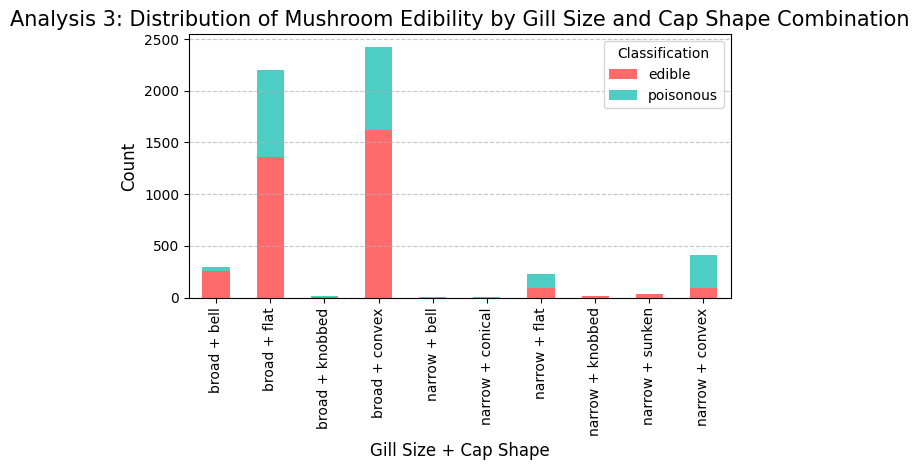

In [49]:
# Create a visualization of combined features
plt.figure(figsize=(14, 8))
# Create a new column that combines the two features
mushroom_data_original['gill_cap_combo'] = mushroom_data_original['gill-size'].astype(str) + '_' + mushroom_data_original['cap-shape'].astype(str)
combo_counts = mushroom_data_original.groupby(['gill_cap_combo', 'poisonous']).size().unstack(fill_value=0)

# Create mapping for combined features
gill_cap_map = {}
for g in gill_size_map:
    for c in cap_shape_map:
        combo = f"{g}_{c}"
        readable = f"{gill_size_map[g]} + {cap_shape_map[c]}"
        gill_cap_map[combo] = readable

# Convert codes to readable names
combo_full_names = [gill_cap_map.get(idx, idx) for idx in combo_counts.index]
combo_counts.index = combo_full_names
combo_counts.columns = [poisonous_map.get(col, col) for col in combo_counts.columns]

# Plot
ax = combo_counts.plot(kind='bar', stacked=True, color=['#ff6b6b', '#4ecdc4'])
plt.title('Analysis 3: Distribution of Mushroom Edibility by Gill Size and Cap Shape Combination', fontsize=15)
plt.xlabel('Gill Size + Cap Shape', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Classification')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [50]:
# Analysis 4: Using ring type and bruises
X4 = mushroom_data[['ring-type', 'bruises']]
y4 = mushroom_data['poisonous']
print("\nAnalysis 4 - Ring type + Bruises:")
print(f"Features shape: {X4.shape}")
print(X4.head())


Analysis 4 - Ring type + Bruises:
Features shape: (5644, 2)
   ring-type  bruises
0          3        1
1          3        1
2          3        1
3          3        1
4          0        0


In [51]:
# Analysis 4: Count combinations of 'ring-type' and 'bruises'
print("===== ANALYSIS 4: RING TYPE AND BRUISES =====")
ring_subcategories = mushroom_data_original['ring-type'].nunique()
bruises_subcategories = mushroom_data_original['bruises'].nunique()
total_possible = ring_subcategories * bruises_subcategories

print(f"'ring-type' has {ring_subcategories} subcategories:")
for ring, count in mushroom_data_original['ring-type'].value_counts().items():
    ring_name = ring_type_map.get(ring, ring)
    print(f"- {ring} ({ring_name}): {count} instances")

print(f"\n'bruises' has {bruises_subcategories} subcategories:")
for bruise, count in mushroom_data_original['bruises'].value_counts().items():
    bruise_name = bruises_map.get(bruise, bruise)
    print(f"- {bruise} ({bruise_name}): {count} instances")

# Count actual combinations
ring_bruise_combo = mushroom_data_original.groupby(['ring-type', 'bruises']).size().reset_index(name='count')
print(f"\nTotal possible combinations: {total_possible}")
print(f"Actual combinations found in data: {len(ring_bruise_combo)}")
print("\nActual combinations:")
for _, row in ring_bruise_combo.iterrows():
    ring = row['ring-type']
    bruise = row['bruises']
    count = row['count']
    ring_name = ring_type_map.get(ring, ring)
    bruise_name = bruises_map.get(bruise, bruise)
    print(f"- {ring} ({ring_name}) + {bruise} ({bruise_name}): {count} instances")

===== ANALYSIS 4: RING TYPE AND BRUISES =====
'ring-type' has 4 subcategories:
- p (pendant): 3488 instances
- l (large): 1296 instances
- e (evanescent): 824 instances
- n (none): 36 instances

'bruises' has 2 subcategories:
- t (bruises): 3184 instances
- f (no bruises): 2460 instances

Total possible combinations: 8
Actual combinations found in data: 5

Actual combinations:
- e (evanescent) + f (no bruises): 824 instances
- l (large) + f (no bruises): 1296 instances
- n (none) + f (no bruises): 36 instances
- p (pendant) + f (no bruises): 304 instances
- p (pendant) + t (bruises): 3184 instances


<Figure size 1400x800 with 0 Axes>

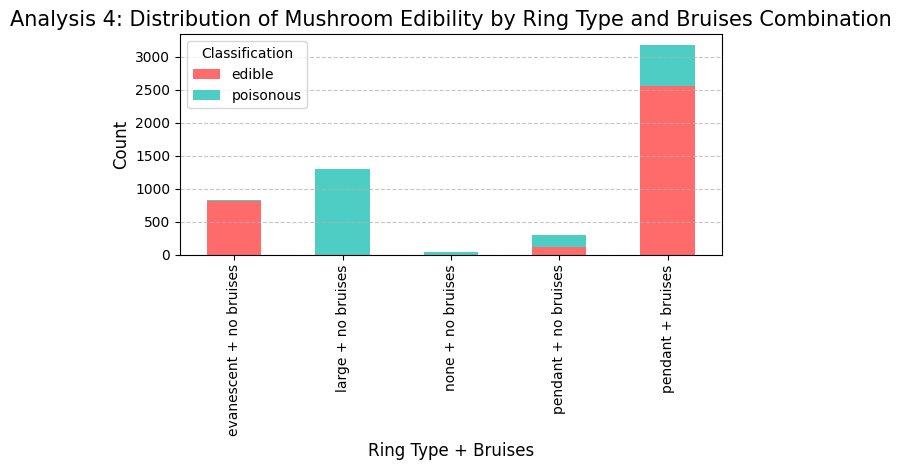

In [52]:
# Create a visualization of combined features
plt.figure(figsize=(14, 8))
# Create a new column that combines the two features
mushroom_data_original['ring_bruises_combo'] = mushroom_data_original['ring-type'].astype(str) + '_' + mushroom_data_original['bruises'].astype(str)
combo_counts = mushroom_data_original.groupby(['ring_bruises_combo', 'poisonous']).size().unstack(fill_value=0)

# Create mapping for combined features
ring_bruises_map = {}
for r in ring_type_map:
    for b in bruises_map:
        combo = f"{r}_{b}"
        readable = f"{ring_type_map[r]} + {bruises_map[b]}"
        ring_bruises_map[combo] = readable

# Convert codes to readable names
combo_full_names = [ring_bruises_map.get(idx, idx) for idx in combo_counts.index]
combo_counts.index = combo_full_names
combo_counts.columns = [poisonous_map.get(col, col) for col in combo_counts.columns]

# Plot
ax = combo_counts.plot(kind='bar', stacked=True, color=['#ff6b6b', '#4ecdc4'])
plt.title('Analysis 4: Distribution of Mushroom Edibility by Ring Type and Bruises Combination', fontsize=15)
plt.xlabel('Ring Type + Bruises', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Classification')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4.1 Split the data into training and test sets

In [53]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")



NameError: name 'X' is not defined

## 4.2 Train a decision tree classifier

In [ ]:

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)



## 4.3 Evaluate performance

In [ ]:
y_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nDecision Tree Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Edible', 'Poisonous'], 
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 5.1 Train an alternative classifier (Random Forest)


In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

# Train a logistic regression model as another alternative
lr_classifier = LogisticRegression(random_state=42, max_iter=200)
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)


## 5.2 Compare performance of all models


In [ ]:

# Function to display metrics
def display_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    return [accuracy, precision, recall, f1]

# Compare all models
dt_metrics = display_metrics(y_test, y_pred, "Decision Tree")
rf_metrics = display_metrics(y_test, rf_predictions, "Random Forest")
lr_metrics = display_metrics(y_test, lr_predictions, "Logistic Regression")

# Visualize model comparison
models = ['Decision Tree', 'Random Forest', 'Logistic Regression']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a DataFrame for visualization
results = pd.DataFrame({
    'Decision Tree': dt_metrics,
    'Random Forest': rf_metrics,
    'Logistic Regression': lr_metrics
}, index=metrics)

# Plot comparison
plt.figure(figsize=(10, 6))
results.plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Models')
plt.tight_layout()
plt.show()